<h2 align="center" style="color:blue">IMPORTING LIBRARIES</h2>

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2 align="center" style="color:blue">DATA LOADING</h2>

In [204]:
df = pd.read_excel("premiums_rest.xlsx")
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


In [205]:

df["genetical_risk"]=0

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29904 entries, 0 to 29903
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    29904 non-null  int64 
 1   Gender                 29904 non-null  object
 2   Region                 29904 non-null  object
 3   Marital_status         29904 non-null  object
 4   Number Of Dependants   29904 non-null  int64 
 5   BMI_Category           29904 non-null  object
 6   Smoking_Status         29895 non-null  object
 7   Employment_Status      29903 non-null  object
 8   Income_Level           29895 non-null  object
 9   Income_Lakhs           29904 non-null  int64 
 10  Medical History        29904 non-null  object
 11  Insurance_Plan         29904 non-null  object
 12  Annual_Premium_Amount  29904 non-null  int64 
 13  genetical_risk         29904 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [207]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.tail(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
29901,37,Female,Northwest,Unmarried,0,Obesity,No Smoking,Salaried,<10L,4,No Disease,Bronze,10957,0
29902,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076,0
29903,48,Female,Southwest,Married,3,Normal,Occasional,Self-Employed,<10L,7,Diabetes,Silver,19730,0


<h2 align="center" style="color:blue">EXPLORATORY DATA ANALYSIS & DATA CLEANING</h2>

### Handle Missing Values

In [208]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [209]:
df.dropna(inplace=True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

### Handling Duplicates

In [210]:
df.drop_duplicates()
df.duplicated().sum()

0

In [211]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


### Data Cleaning - Number of Dependents

In [212]:
df[df["number_of_dependants"]<0]["number_of_dependants"].unique()

array([-1, -3], dtype=int64)

In [213]:
df["number_of_dependants"] = df["number_of_dependants"].abs()

In [214]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.385933,23.364184,20892.303821,0.0
std,13.412657,1.421137,24.740339,6936.813440,0.0
min,26.000000,0.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


## 1. Numeric Columns

### Univariate Analysis: Numeric Columns

##### Box Plots for Numeric Columns

In [215]:
numeric_columns = df.select_dtypes(include=["int64","float64"]).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

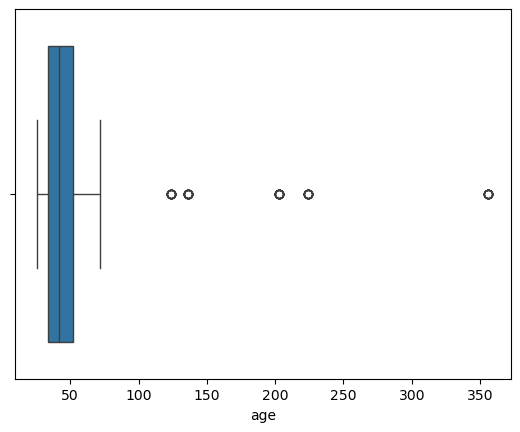

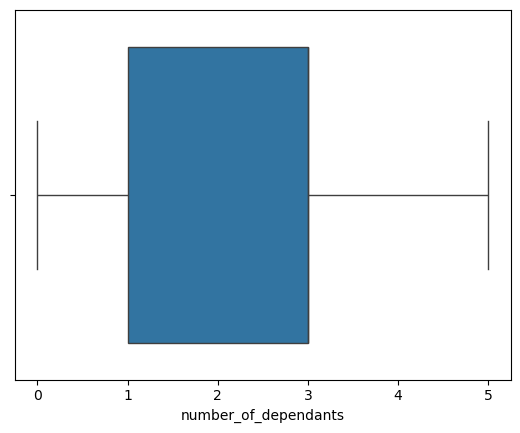

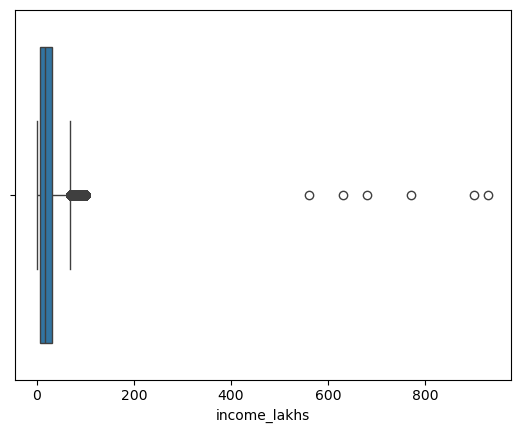

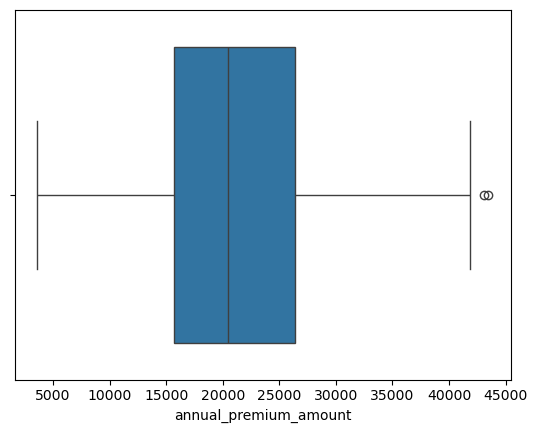

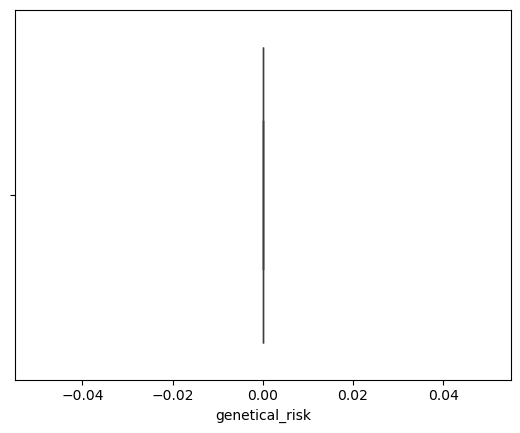

In [216]:
for i in numeric_columns:
    sns.boxplot(x=df[i])
    plt.show()

### Outlier Treatment: Age Column

In [217]:
df[df.age > 100]["age"].unique()

array([224, 124, 136, 203, 356], dtype=int64)

In [218]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.0
mean,43.095380,2.387790,23.371530,20901.900563,0.0
std,11.041991,1.420641,24.751262,6928.457636,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15706.000000,0.0
50%,42.000000,3.000000,17.000000,20496.000000,0.0
75%,52.000000,3.000000,32.000000,26361.000000,0.0
max,72.000000,5.000000,930.000000,43471.000000,0.0


<Axes: xlabel='income_lakhs', ylabel='Count'>

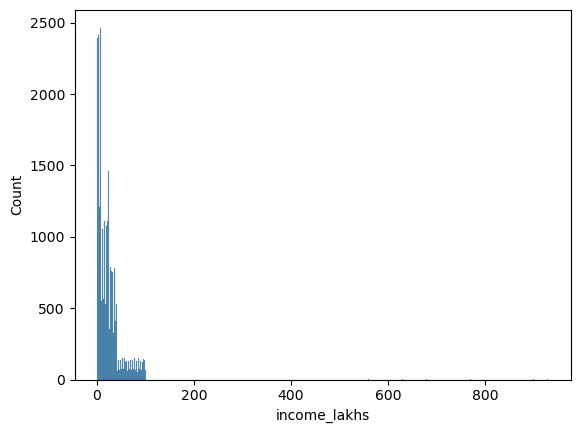

In [219]:
sns.histplot(df1.income_lakhs)

In [220]:
Q1 = df1['income_lakhs'].quantile(0.25)
Q3 = df1['income_lakhs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -30.5
Upper Bound: 69.5


This dataset is based in India, where the maximum earnings of individuals are likely to exceed the upper bound of the interquartile range (IQR). Therefore, we are using the normal distribution's quantiles to calculate the income levels, allowing us to account for and unbound potential outliers in the data

In [221]:
quantity_threshold = df1.income_lakhs.quantile(0.999)
quantity_threshold

100.0

In [222]:
df2 = df1[df1.income_lakhs <= quantity_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.387734,23.226343,20900.689223,0.0
std,11.042430,1.420644,22.455408,6928.192115,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


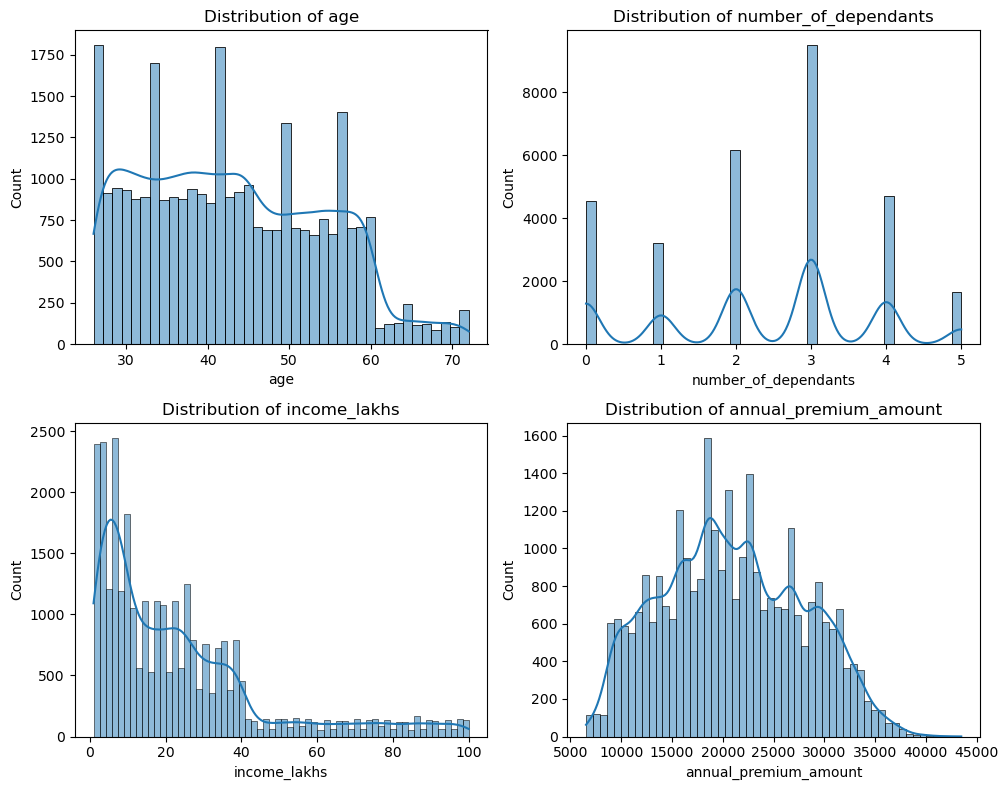

In [223]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))


axes = axes.flatten()

for i, col in enumerate(numeric_columns[:4]):
    sns.histplot(df2[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

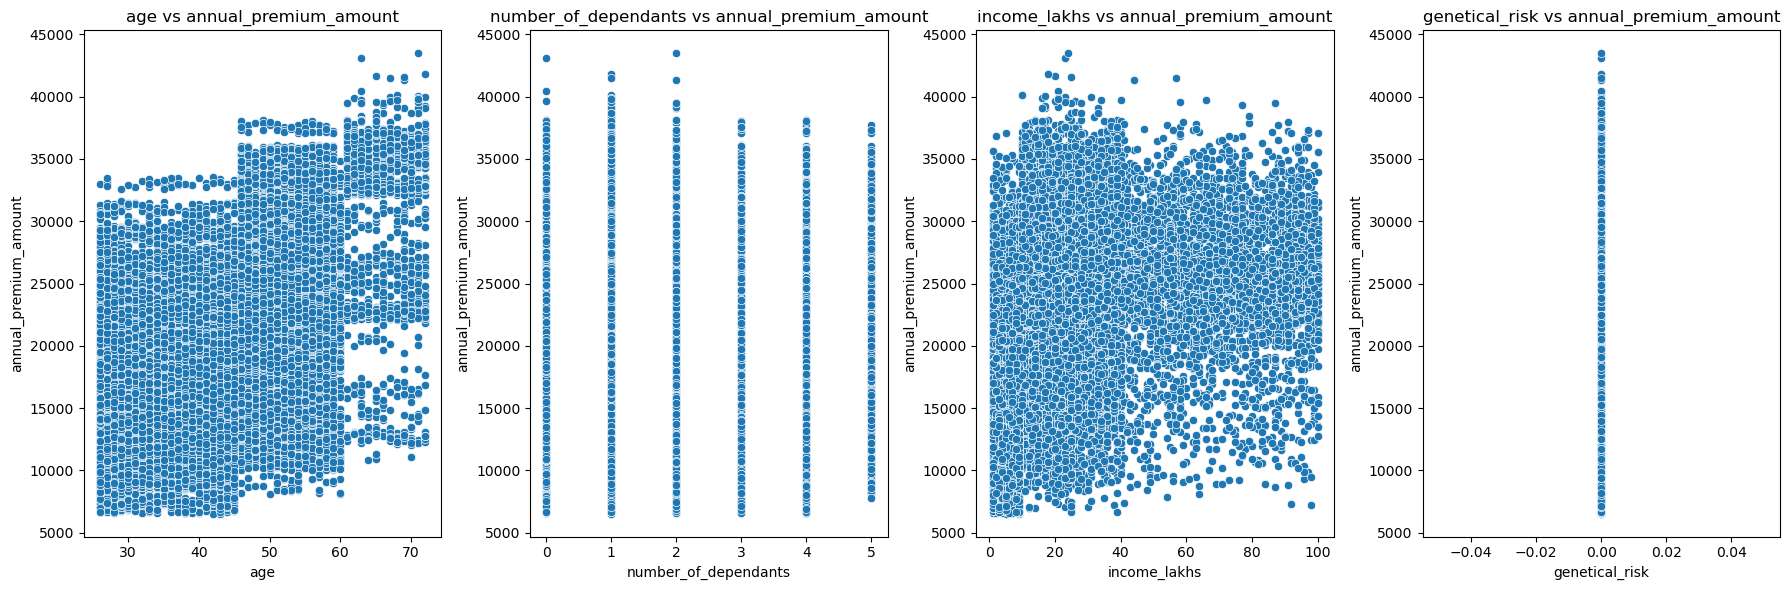

In [224]:

numeric_features = ["age", "number_of_dependants", "income_lakhs","genetical_risk"]
"annual_premium_amount"

# Create a 1x3 grid for the scatter plots
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Loop through the numeric features and plot each one against the dependent feature
for i, feature in enumerate(numeric_features):
    sns.scatterplot(data=df2, x=feature, y="annual_premium_amount", ax=axes[i])
    axes[i].set_title(f'{feature} vs {"annual_premium_amount"}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("annual_premium_amount")

# Adjust the layout
plt.tight_layout()
plt.show()


### Catergorical Feature

In [225]:
categorical_features = [ feature for feature in df2.columns if df2[feature].dtype == "O"]
print(categorical_features)

['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']


In [226]:
for feature in categorical_features:
    unique = df2[feature].unique()
    print(feature,":",unique)

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [227]:
df2["smoking_status"].replace({
    "No Smoking" : "Not Smoking",
    "Smoking=0" : "Not Smoking",
    "Does Not Smoke" : "Not Smoking"
},inplace=True)
df2["smoking_status"].unique()

C:\Users\smjha\AppData\Local\Temp\ipykernel_21120\1420607774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["smoking_status"].replace({


array(['Not Smoking', 'Regular', 'Occasional'], dtype=object)

In [228]:
pct = df2["gender"].value_counts(normalize=True)
pct

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

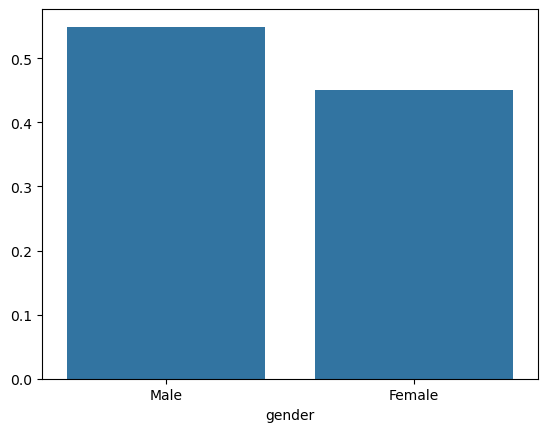

In [229]:
sns.barplot(x=pct.index,y=pct.values)

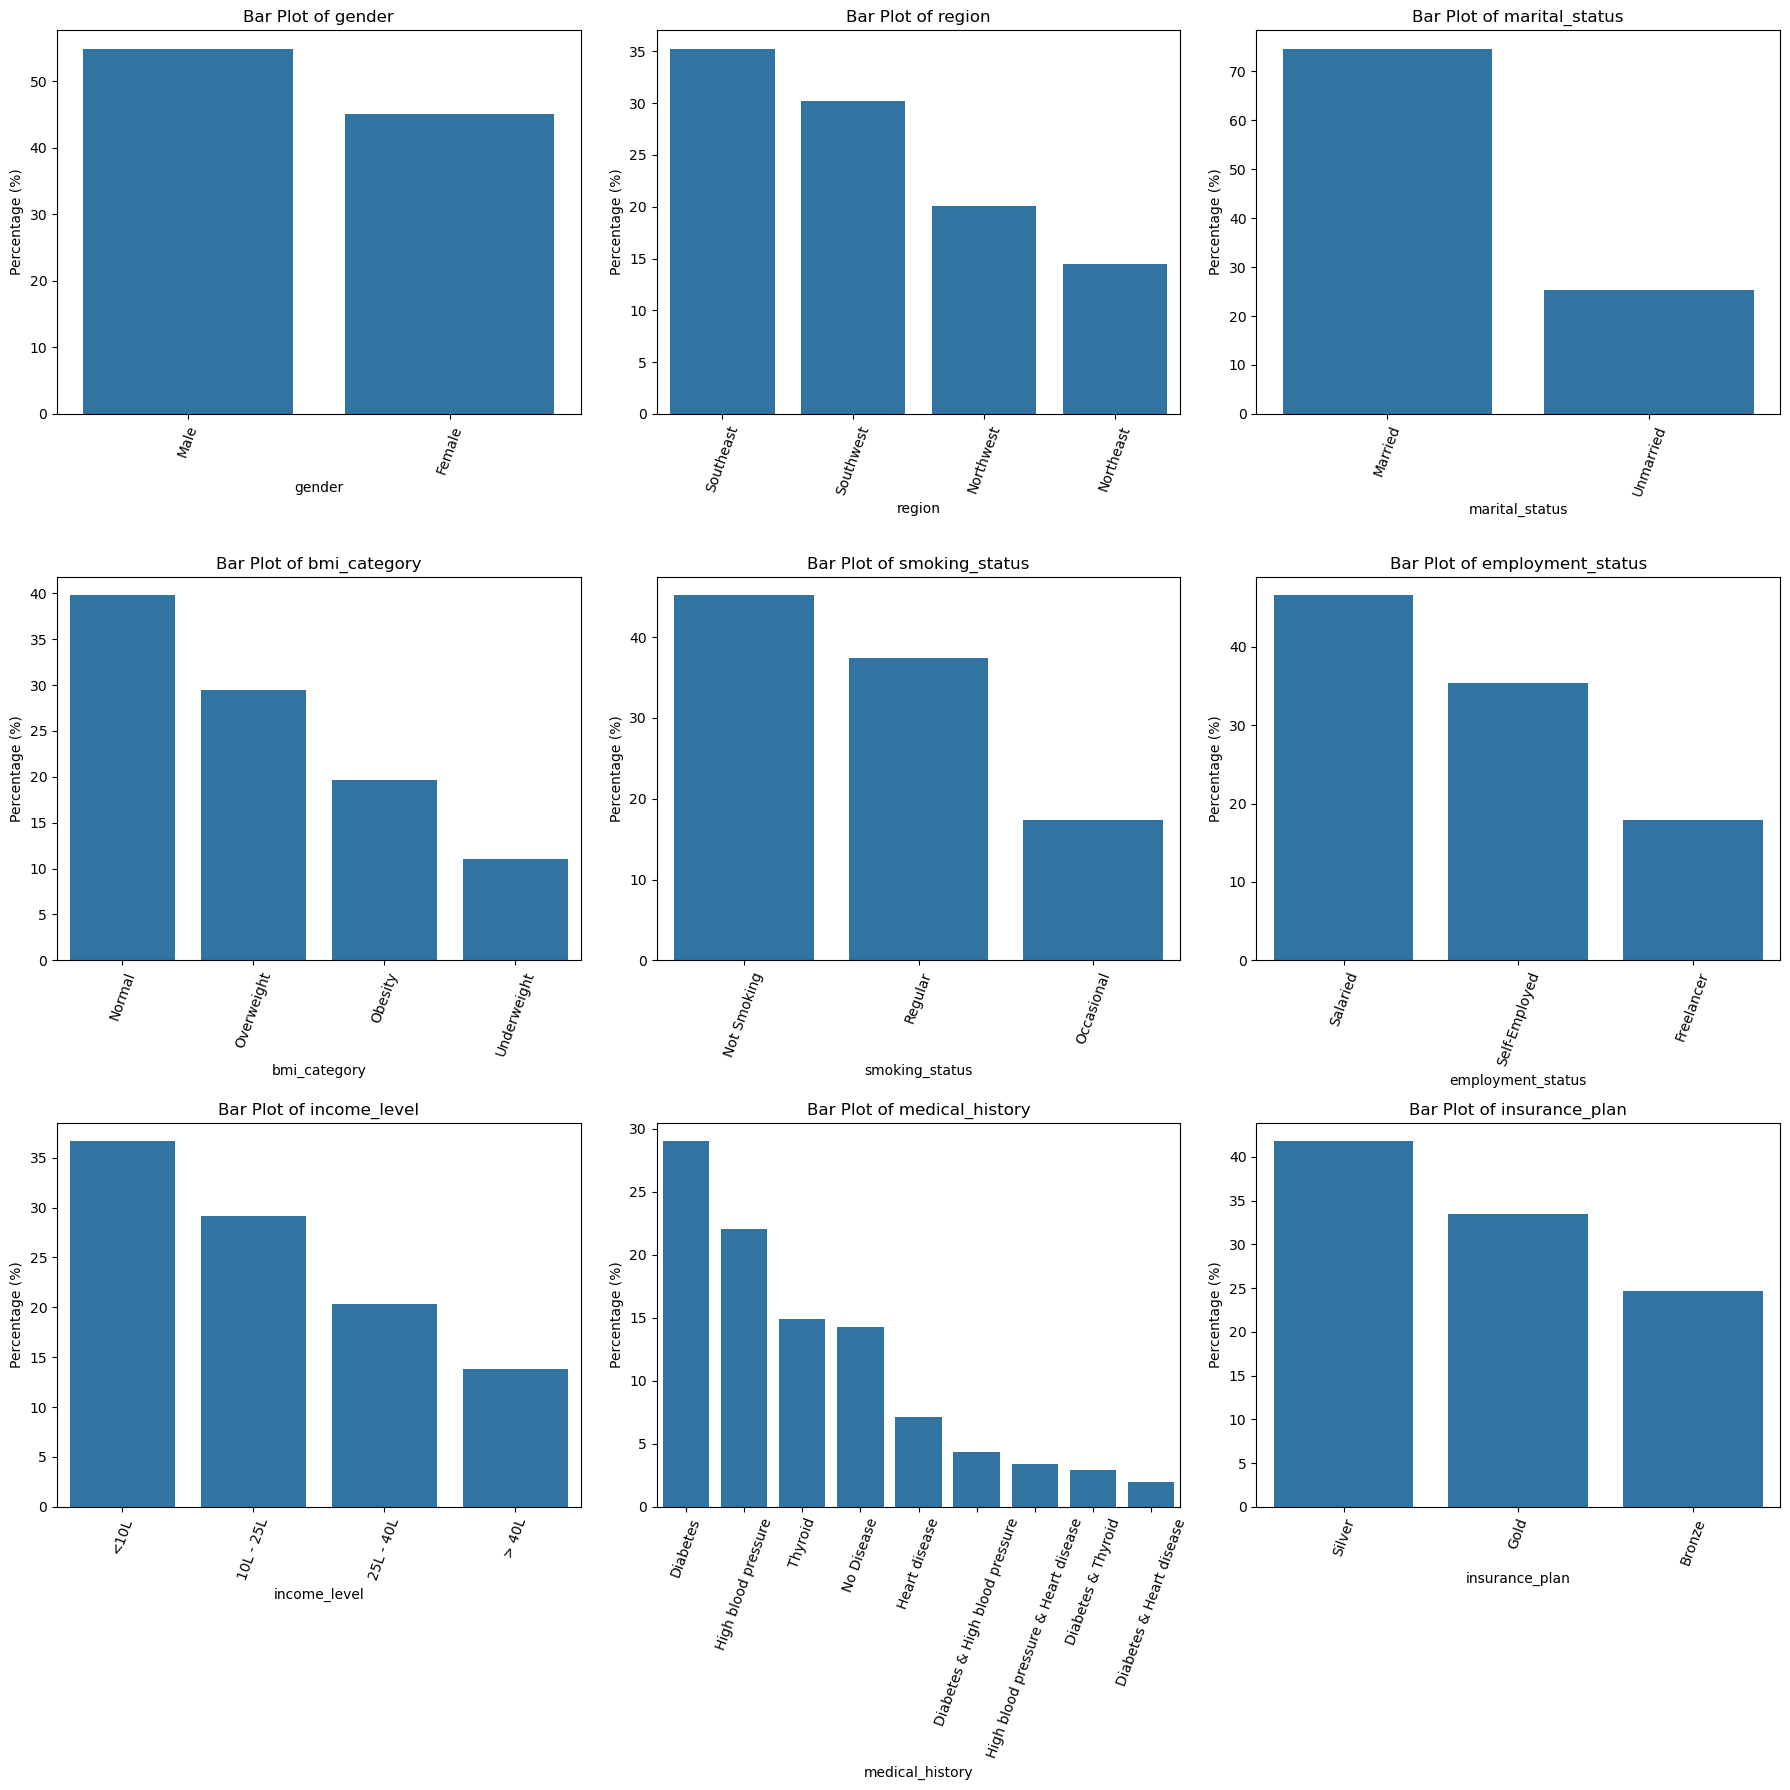

In [230]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()  # Flatten to easily index subplots

# Create a bar plot for each categorical feature
for i, feature in enumerate(categorical_features):
    # Calculate the percentage or count of each category
    pct = df2[feature].value_counts(normalize=True) * 100
    
    # Create the bar plot
    sns.barplot(x=pct.index, y=pct.values, ax=axes[i])
    axes[i].set_title(f'Bar Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Percentage (%)')
    axes[i].tick_params(axis='x', rotation=70)

# Adjust layout
plt.tight_layout()
plt.show()

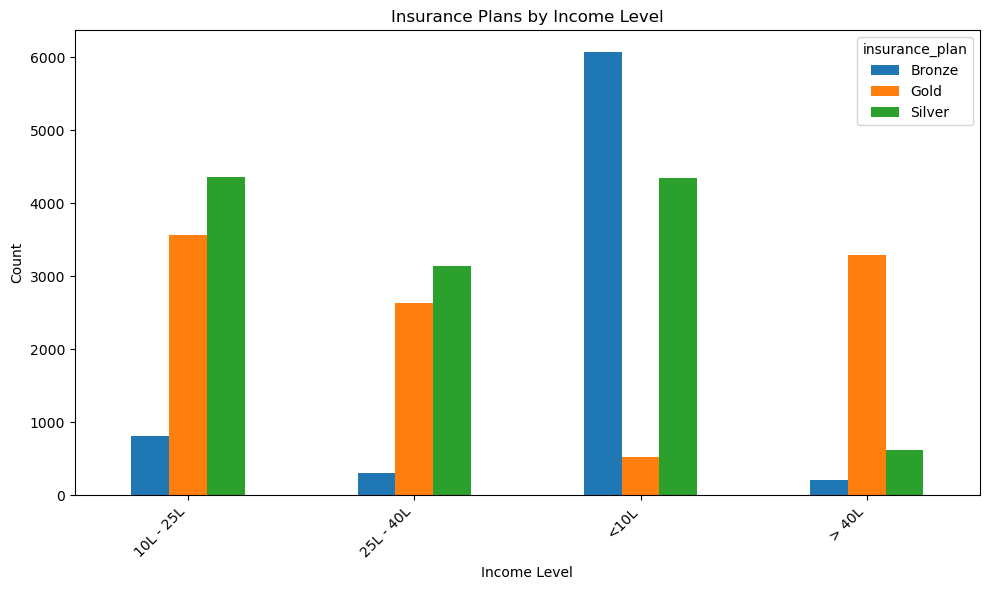

In [231]:
crosstab = pd.crosstab(df["income_level"], df["insurance_plan"])

# Plot the crosstab as a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot with minimal customization
crosstab.plot(kind="bar", ax=ax)

# Add title and labels
ax.set_title('Insurance Plans by Income Level')
ax.set_xlabel('Income Level')
ax.set_ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [232]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,Not Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0


In [233]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [234]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df2[["disease1","disease2"]] = df2["medical_history"].str.split(" & ",expand=True).apply(lambda x: x.str.lower())

In [235]:
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')
df2["total_risk_score"]=0

for disease in ["disease1","disease2"]:
    df2["total_risk_score"] += df2[disease].map(risk_scores)

df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,Not Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6


In [236]:
max_score = df2["total_risk_score"].max()
min_score = df2["total_risk_score"].min()

df2["normalized_risk_score"] = (df2["total_risk_score"] - min_score )/ (max_score - min_score)
df2.head(2)
    

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,Not Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571


In [237]:
df2["insurance_plan"] = df2["insurance_plan"].map({"Bronze":1,"Silver":2,"Gold":3})
df2["income_level"] = df2["income_level"].map({"<10L":1,"10L - 25L":2,"> 40L":4,"25L - 40L":3})
df2 = df2.drop(["medical_history","disease1","disease2","total_risk_score"],axis=1)

In [238]:
nominal_features = ["gender","region","marital_status","bmi_category","smoking_status","employment_status"]
df3 = pd.get_dummies(df2,columns=nominal_features,drop_first=True,dtype=int)
df3.shape

(29822, 20)

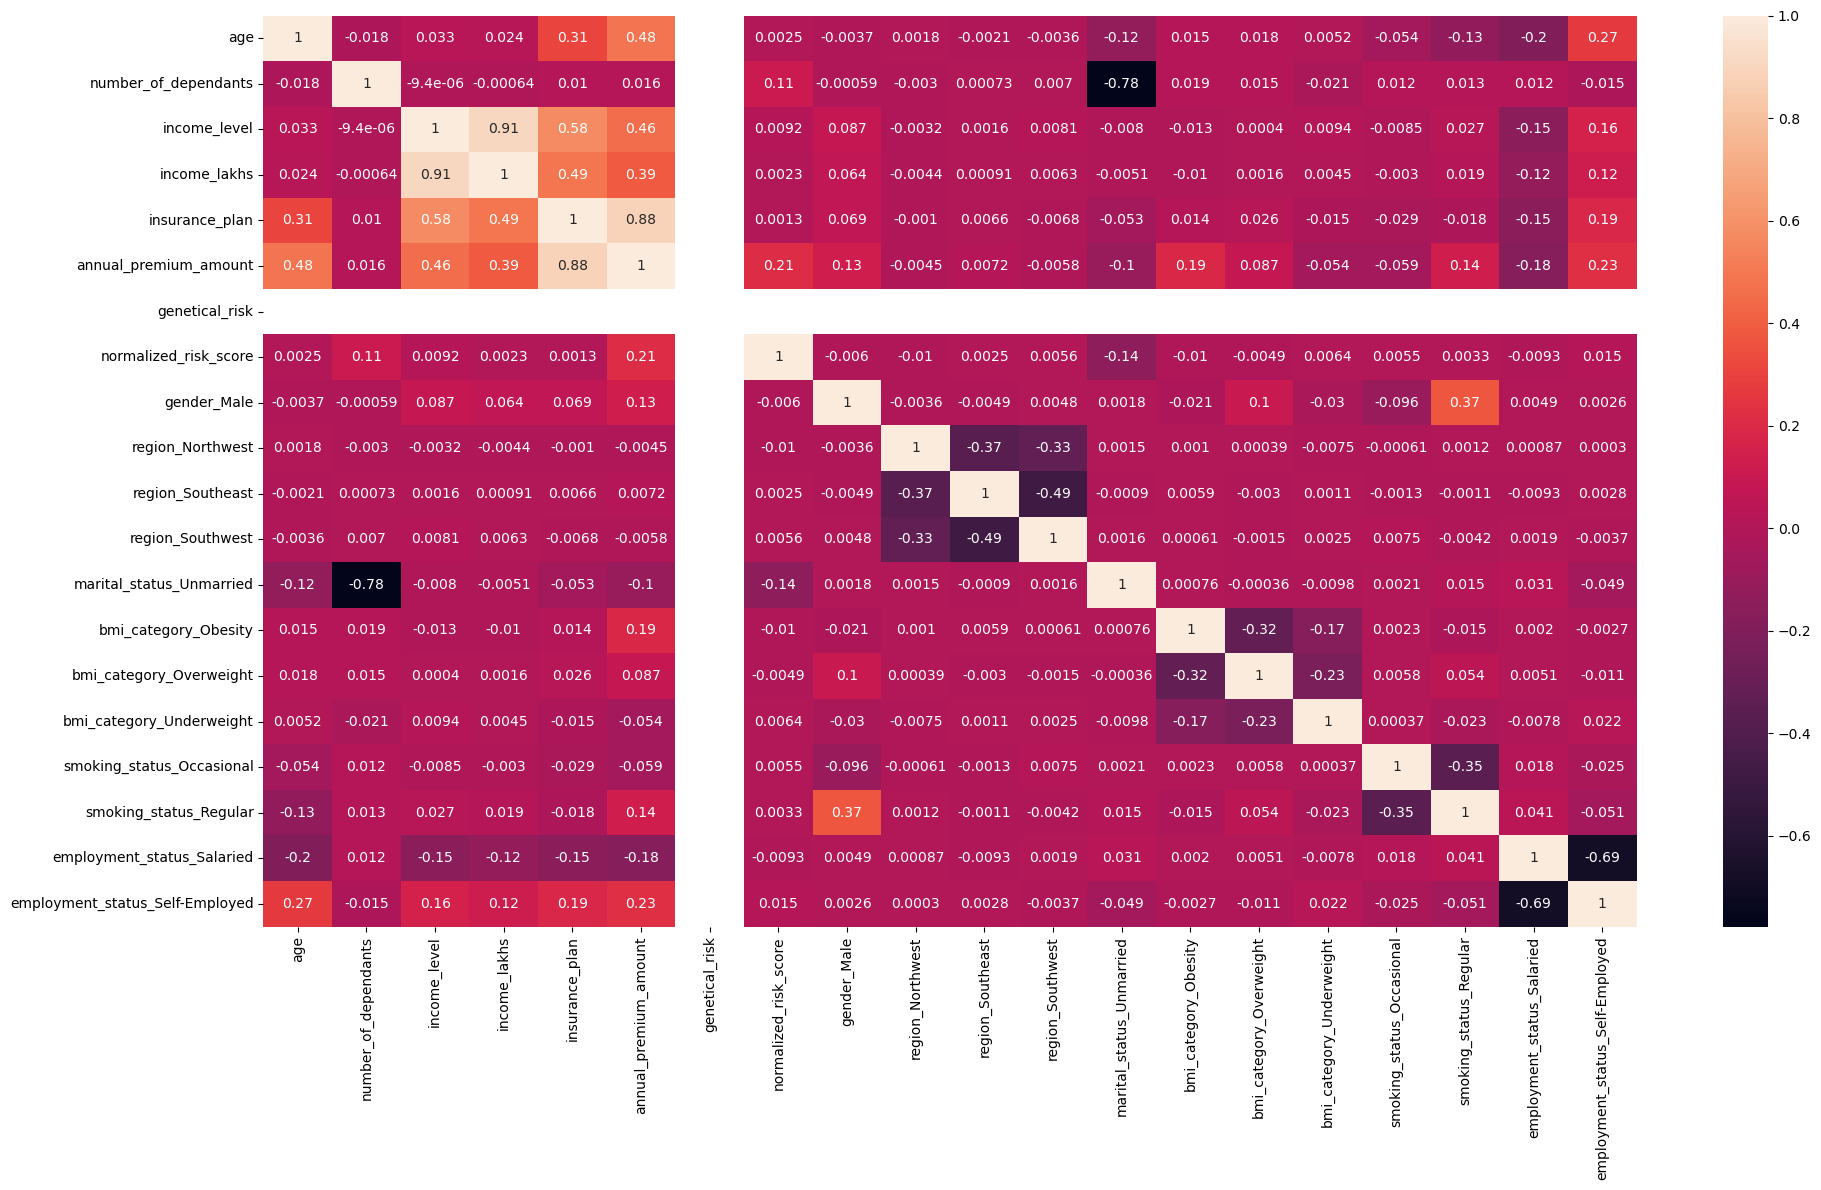

In [239]:
cm = df3.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(cm, annot=True)

plt.tight_layout()
plt.show()

#### Feature Scaling

In [240]:
X = df3.drop("annual_premium_amount",axis=1)
y = df3["annual_premium_amount"]

In [241]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ["age","number_of_dependants","income_lakhs","income_level","insurance_plan","genetical_risk"]
X[cols_to_scale]= scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [242]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["columns"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

calculate_vif(X)



C:\Users\smjha\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,columns,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,genetical_risk,NaN
6,normalized_risk_score,3.810619
7,gender_Male,2.599098
8,region_Northwest,2.123965
9,region_Southeast,2.980842


In [243]:
X = X.drop("income_level",axis=1)

In [244]:
calculate_vif(X)

C:\Users\smjha\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,columns,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,genetical_risk,NaN
5,normalized_risk_score,3.808345
6,gender_Male,2.591439
7,region_Northwest,2.123277
8,region_Southeast,2.979899
9,region_Southwest,2.708641


### Model Training

In [245]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_test.shape,y_train.shape
X_test.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
5495,0.021739,0.8,0.838384,1.0,0.0,0.785714,1,0,0,1,0,1,0,0,0,1,1,0
582,0.695652,0.8,0.000000,0.5,0.0,1.000000,0,0,1,0,0,1,0,0,0,0,0,1


In [246]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

Train_score : 0.9530815646744318
Test_score  : 0.9546117251336063


<BarContainer object of 18 artists>

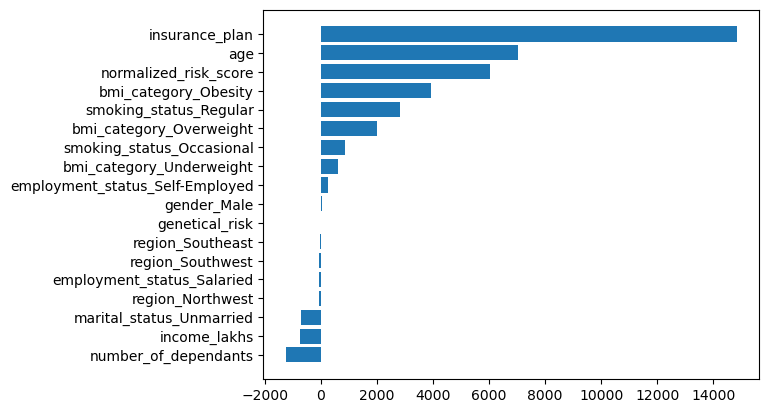

In [247]:
model = LinearRegression()
model.fit(X_train,y_train)
print(f"Train_score : {model.score(X_train,y_train)}")
print(f"Test_score  : {model.score(X_test,y_test)}")

feature_importance = model.coef_

coef_df = pd.DataFrame(feature_importance,index=X_test.columns,columns=["Coefficients"])
coef_df = coef_df.sort_values(by="Coefficients")
plt.barh(coef_df.index,coef_df["Coefficients"])

Train_score : 0.9530649547084156
Test_score  : 0.9546027848899604


<BarContainer object of 18 artists>

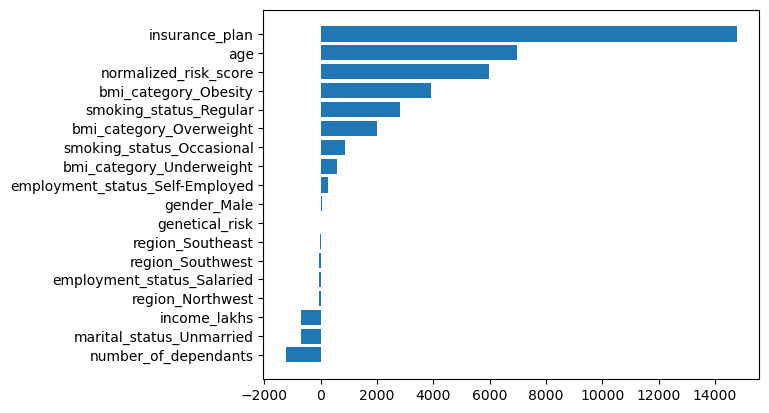

In [248]:
model = Ridge(alpha=10)
model.fit(X_train,y_train)
print(f"Train_score : {model.score(X_train,y_train)}")
print(f"Test_score  : {model.score(X_test,y_test)}")

feature_importance = model.coef_

coef_df = pd.DataFrame(feature_importance,index=X_test.columns,columns=["Coefficients"])
coef_df = coef_df.sort_values(by="Coefficients")
plt.barh(coef_df.index,coef_df["Coefficients"])

In [249]:
model = XGBRegressor()
model.fit(X_train,y_train)
print(f"Train_score : {model.score(X_train,y_train)}")
print(f"Test_score  : {model.score(X_test,y_test)}")

Train_score : 0.9986148476600647
Test_score  : 0.9980103969573975


In [250]:
model = XGBRegressor()
params = {
    "n_estimators" : [75,85,90],
    "learning_rate" : [0.1,0.3,0.4],
    "max_depth" : [5,6,7]
}

random_search = RandomizedSearchCV(model,params,cv=3,n_iter=10,scoring="r2")
random_search.fit(X_train,y_train)
random_search.best_score_,random_search.best_params_,random_search.best_estimator_

(0.9980336229006449,
 {'n_estimators': 85, 'max_depth': 7, 'learning_rate': 0.1},
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=85, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
              reg_lambda=1, ...))

In [251]:
best_model = random_search.best_estimator_

<BarContainer object of 18 artists>

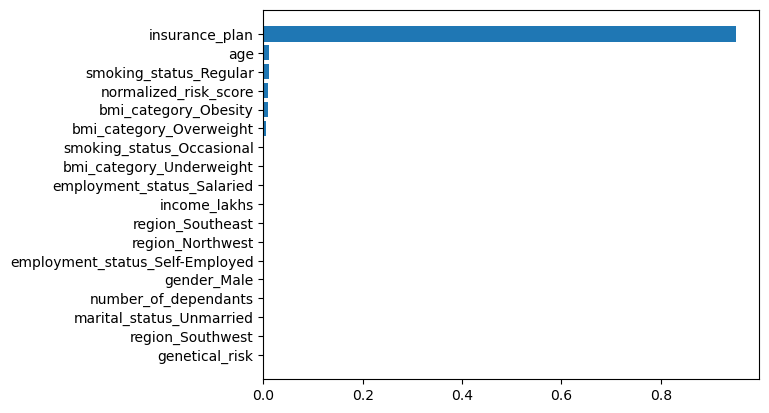

In [252]:
feature_importance = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importance,index=X_test.columns,columns=["Coefficients"])
coef_df = coef_df.sort_values(by="Coefficients")
plt.barh(coef_df.index,coef_df["Coefficients"])

###  Error Analysis

In [253]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals/y_test)*100

results_df = pd.DataFrame({
    "actual" : y_test,
    "predicted" : y_test,
    "difference" : residuals,
    "diff_pct" : residuals_pct
})

results_df.head()

,actual,predicted,difference,diff_pct
5495,30838,30838,315.162109,1.021993
582,26306,26306,42.085938,0.159986
281,17983,17983,-427.603516,-2.377821
15443,19345,19345,-308.128906,-1.592809
24281,33317,33317,275.058594,0.825580


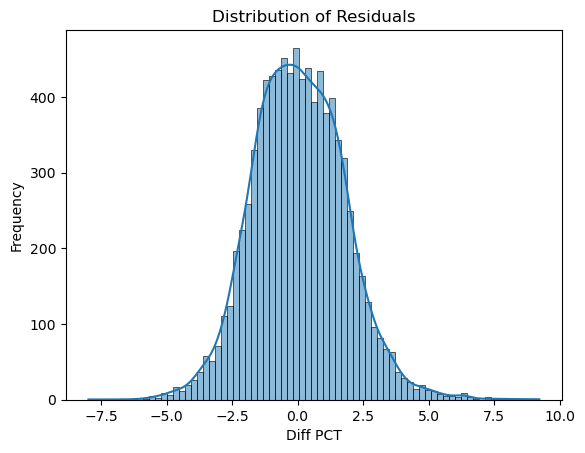

In [254]:
sns.histplot(results_df["diff_pct"],kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [255]:
X_test.shape

(8947, 18)

In [256]:
extreme_error_threshold = 10
extreme_error_df = results_df[np.abs(results_df["diff_pct"])>extreme_error_threshold]
extreme_error_df.head()

,actual,predicted,difference,diff_pct


In [257]:
extreme_error_df.shape

(0, 4)

In [258]:
extreme_error_pct = (extreme_error_df.shape[0]*100)/X_test.shape[0]
extreme_error_pct

0.0

We have 30% extreme errors which means for 30% customers we will either overcharge or undercharge by 10% or more

In [259]:
extreme_error_df[abs(extreme_error_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,predicted,difference,diff_pct


There will be about 517 customers whom we will overcharge or underchage by more than 50%

In [260]:
extreme_errors_df = X_test.loc[extreme_error_df.index]
extreme_errors_df.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed


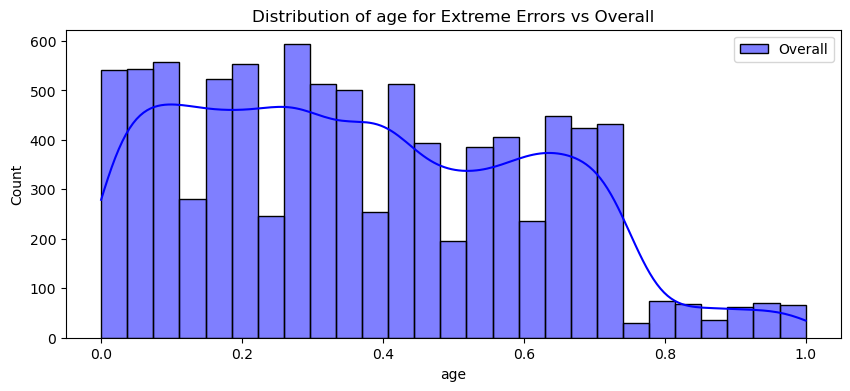

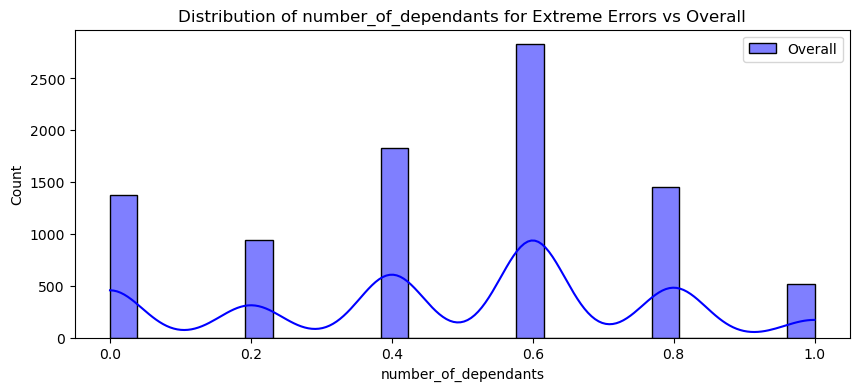

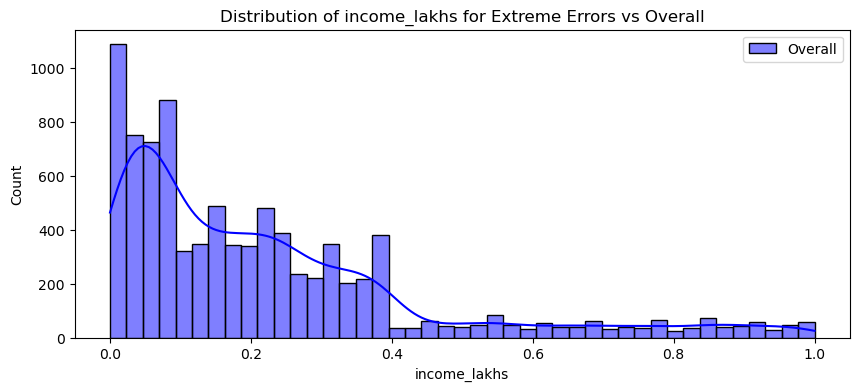

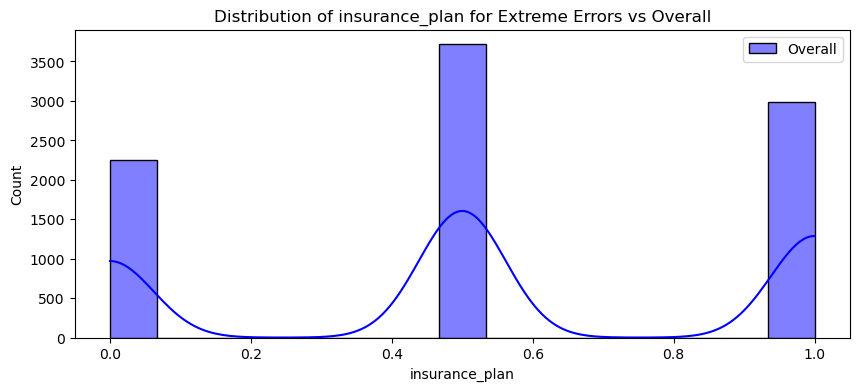

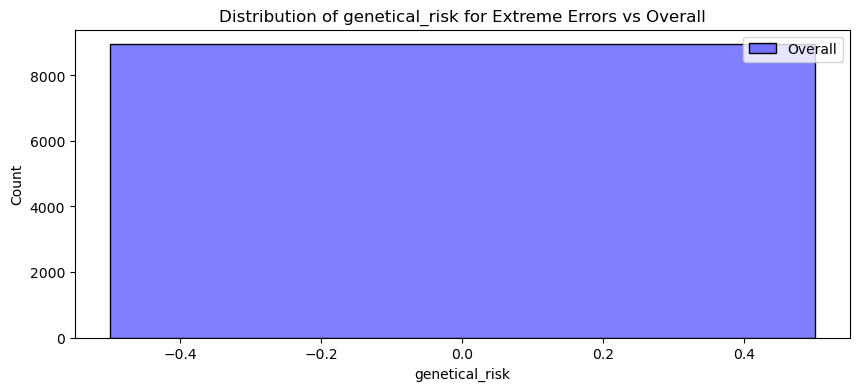

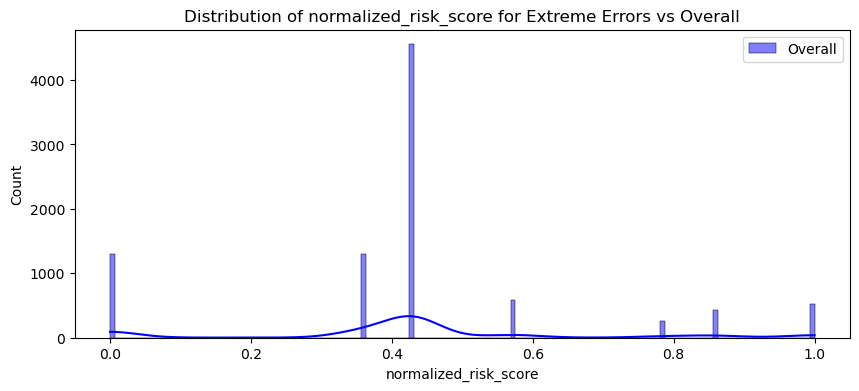

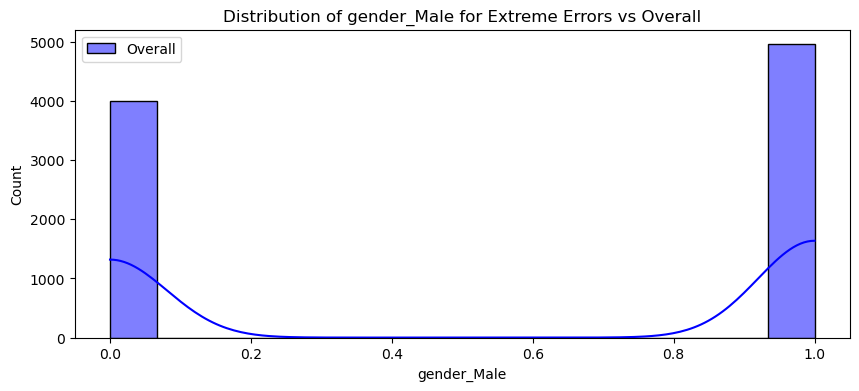

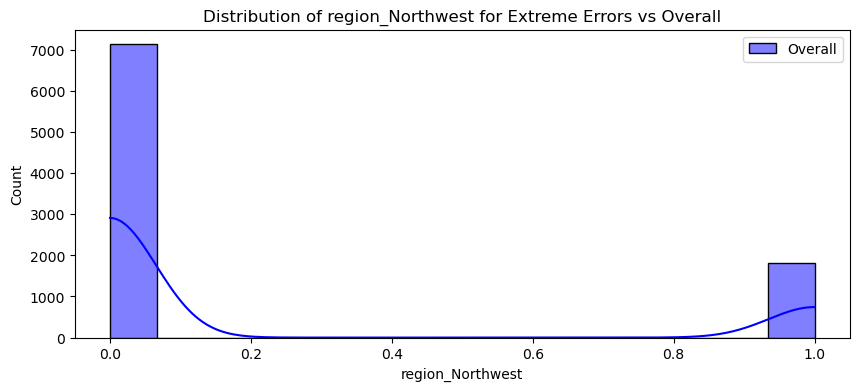

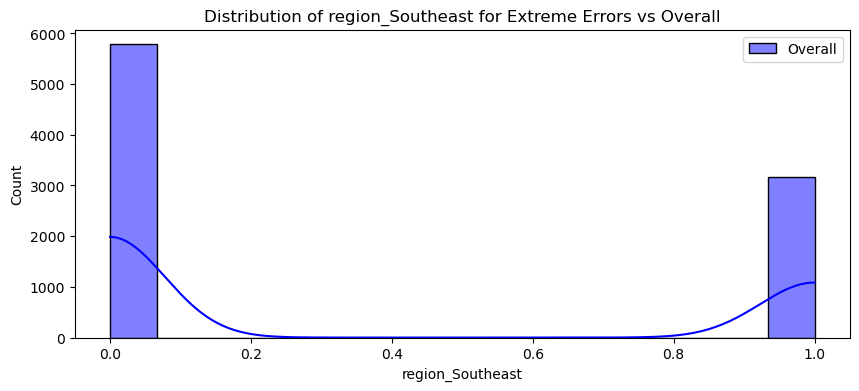

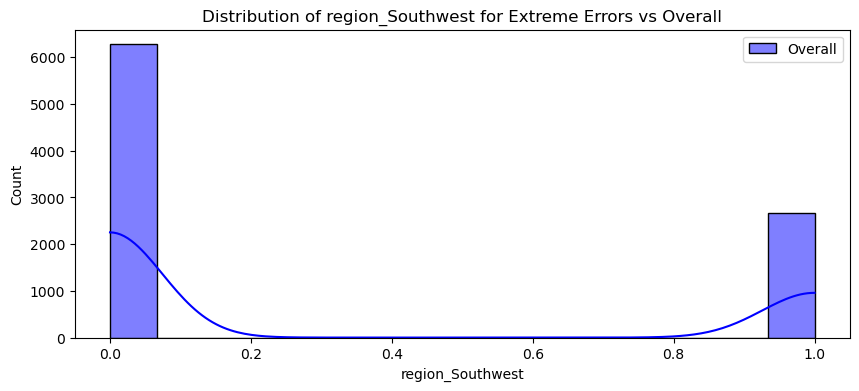

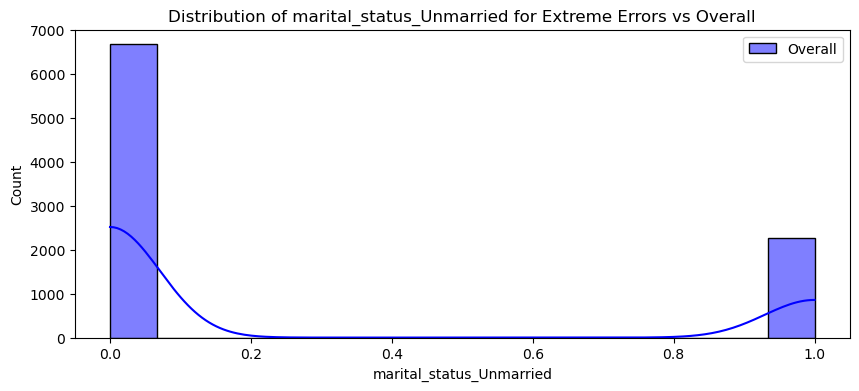

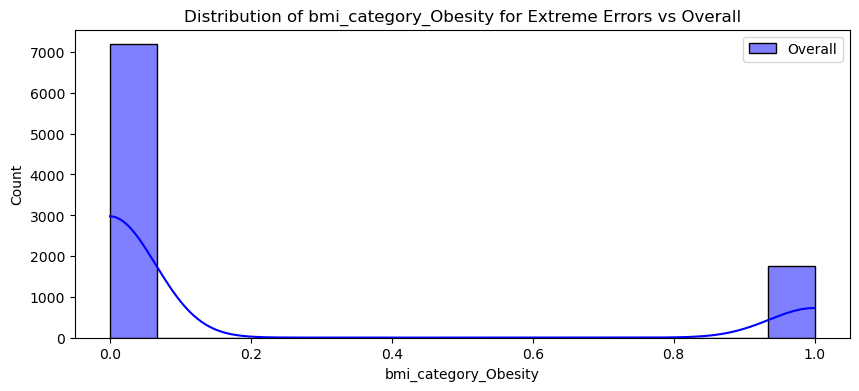

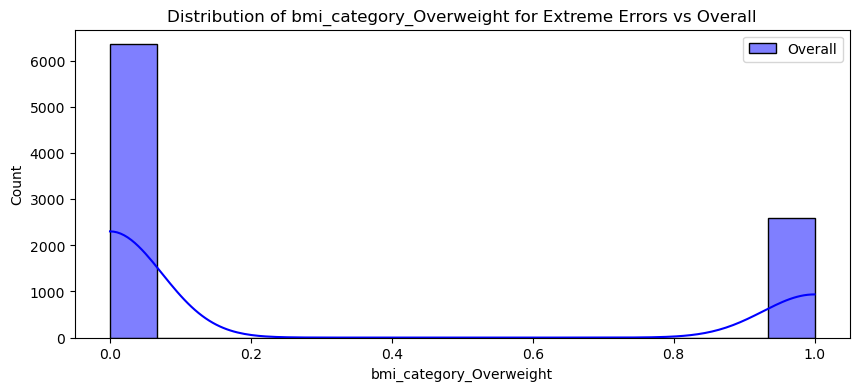

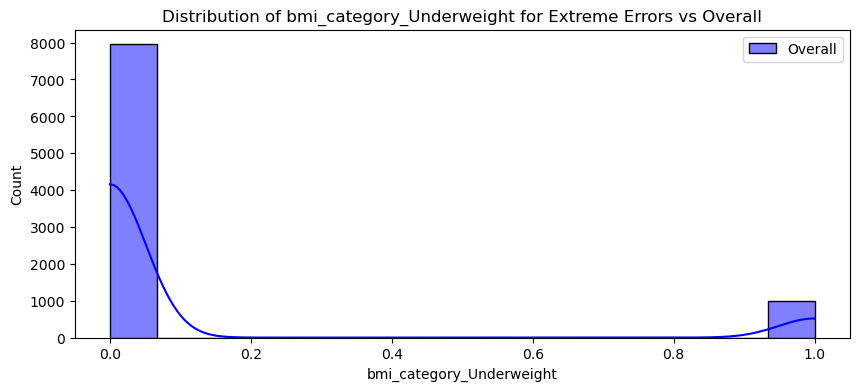

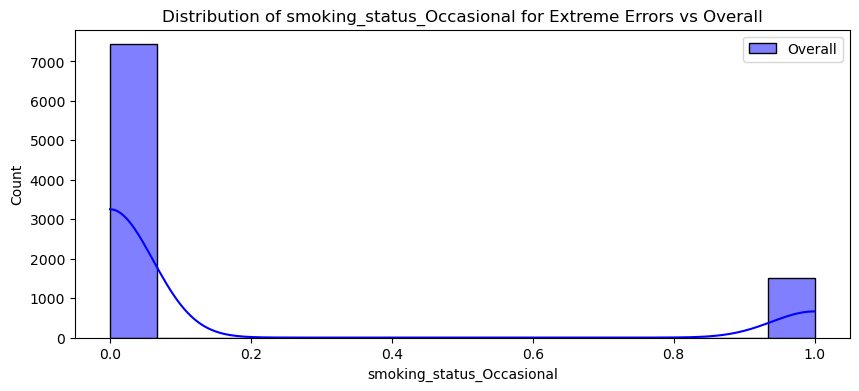

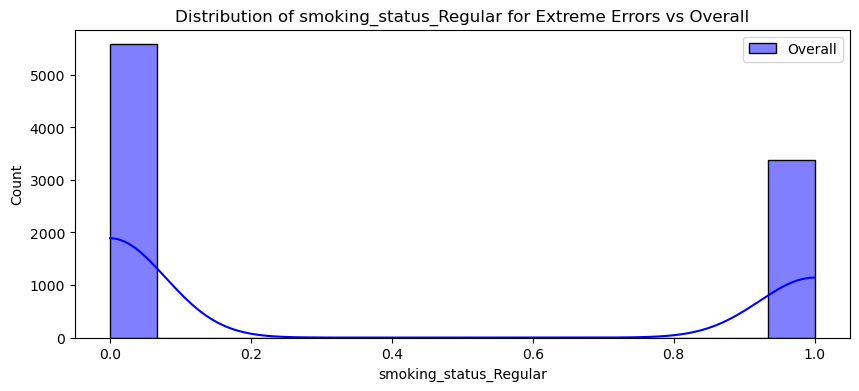

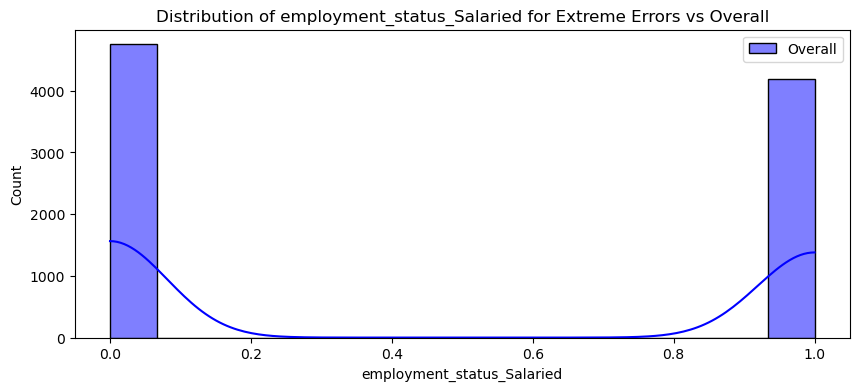

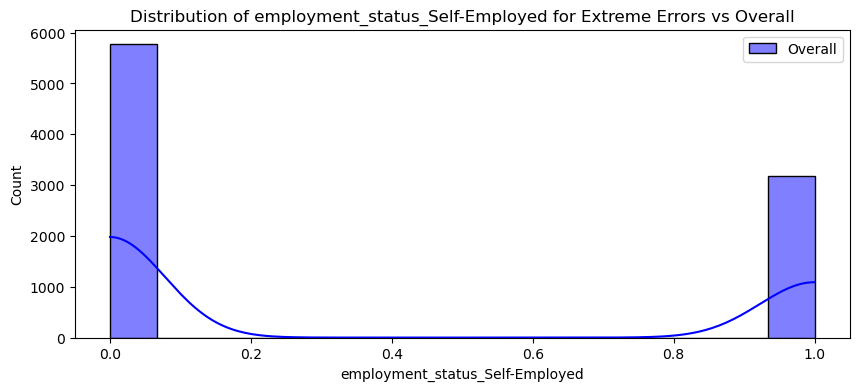

In [261]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

In [262]:
from joblib import dump

dump(best_model,r"E:\ML Projects\Health Care Premium Prediction\app\artifacts\model_rest.joblib")
scaler_with_cols = {
    "scaler" : scaler,
    "columns_to_scale" : cols_to_scale
}
dump(scaler_with_cols,r"E:\ML Projects\Health Care Premium Prediction\app\artifacts\scaler_rest.joblib")

['E:\\ML Projects\\Health Care Premium Prediction\\app\\artifacts\\scaler_rest.joblib']